In [1]:
from cryoS2Sdrop.analyze import *
from cryoS2Sdrop.deconvolution import tom_deconv_tomo

deconv_kwargs = {
    "angpix": 10,
    "defocus": 0,
    "snrfalloff": 0.3,
    "deconvstrength": 1,
    "highpassnyquist": 0.02,
}

PARENT_PATH = setup.PARENT_PATH

pd.options.display.float_format = "{:,.6f}".format
pd.set_option('display.max_columns', 50)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# Tomo04

In [2]:
tomo_list = ['tomo04_dummy']

data_log = []

for tomo in tomo_list:
    logdir = 'data/S2SDenoising/model_logs/%s/fourierHFplusVolMask_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True, ignore_deconv=False)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log

model    version                    dataset  \
0  fourierHFplusVolMask_comparison  version_0  singleCET_FourierDataset    
1  fourierHFplusVolMask_comparison  version_1  singleCET_FourierDataset    
5  fourierHFplusVolMask_comparison  version_2  singleCET_FourierDataset    
3  fourierHFplusVolMask_comparison  version_3  singleCET_FourierDataset    
2  fourierHFplusVolMask_comparison  version_4  singleCET_FourierDataset    
4  fourierHFplusVolMask_comparison  version_5  singleCET_FourierDataset    

  TV_alpha                                    Version_comment     transform  \
0        0               Fourier with mixed Mask, dropout 0.5  {'p': '0.5'}   
1        0  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   
5        0  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   
3        0   Fourier with mixed Mask, dropout 0.5 deconvolved  {'p': '0.5'}   
2        0  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   
4        0  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   

   full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0       17.547152        0.492704      13.637398       0.272060   
1       17.930424        0.493168      13.637398       0.272060   
5       17.017471        0.444228      13.637398       0.272060   
3       17.354311        0.415969      17.976477       0.524278   
2       15.881323        0.365443      17.976477       0.524278   
4       15.607146        0.337244      17.976477       0.524278   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
5  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
5  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p n2v_psnr n2v_ssim  baseline_psnr_best  \
0             null           false  0.5     None     None           17.976477   
1             null           false  0.5     None     None           17.976477   
5             null           false  0.7     None     None           17.976477   
3             null            true  0.5     None     None           17.976477   
2             null            true  0.5     None     None           17.976477   
4             null            true  0.7     None     None           17.976477   

   baseline_ssim_best  ssim_vs_baseline  n2v_ssim_vs_baseline  \
0            0.524278         -6.022348                   NaN   
1            0.524278         -5.933852                   NaN   
5            0.524278        -15.268513                   NaN   
3            0.524278        -20.658744                   NaN   
2            0.524278        -30.295846                   NaN   
4            0.524278        -35.674589                   NaN   

   psnr_vs_baseline  n2v_psnr_vs_baseline noise_level     tomo_name  \
0         -2.388261                   NaN        None  tomo04_dummy   
1         -0.256184                   NaN        None  tomo04_dummy   
5         -5.334779                   NaN        None  tomo04_dummy   
3         -3.460999                   NaN        None  tomo04_dummy   
2        -11.654975                   NaN        None  tomo04_dummy   
4        -13.180171                   NaN        None  tomo04_dummy   

                 

index                            model    version  \
0      1  fourierHFplusVolMask_comparison  version_1   
1      5  fourierHFplusVolMask_comparison  version_2   
2      3  fourierHFplusVolMask_comparison  version_3   
3      4  fourierHFplusVolMask_comparison  version_5   

                     dataset TV_alpha  \
0  singleCET_FourierDataset         0   
1  singleCET_FourierDataset         0   
2  singleCET_FourierDataset         0   
3  singleCET_FourierDataset         0   

                                     Version_comment     transform  \
0  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   
1  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   
2   Fourier with mixed Mask, dropout 0.5 deconvolved  {'p': '0.5'}   
3  HF + VolMask + invMask with bernoulli prob 0.1...  {'p': '0.5'}   

   full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0       17.930424        0.493168      13.637398       0.272060   
1       17.017471        0.444228      13.637398       0.272060   
2       17.354311        0.415969      17.976477       0.524278   
3       15.607146        0.337244      17.976477       0.524278   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p n2v_psnr n2v_ssim  baseline_psnr_best  \
0             null           false  0.5     None     None           17.976477   
1             null           false  0.7     None     None           17.976477   
2             null            true  0.5     None     None           17.976477   
3             null            true  0.7     None     None           17.976477   

   baseline_ssim_best  ssim_vs_baseline  n2v_ssim_vs_baseline  \
0            0.524278         -5.933852                   NaN   
1            0.524278        -15.268513                   NaN   
2            0.524278        -20.658744                   NaN   
3            0.524278        -35.674589                   NaN   

   psnr_vs_baseline  n2v_psnr_vs_baseline noise_level     tomo_name  \
0         -0.256184                   NaN        None  tomo04_dummy   
1         -5.334779                   NaN        None  tomo04_dummy   
2         -3.460999                   NaN        None  tomo04_dummy   
3        -13.180171                   NaN        None  tomo04_dummy   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

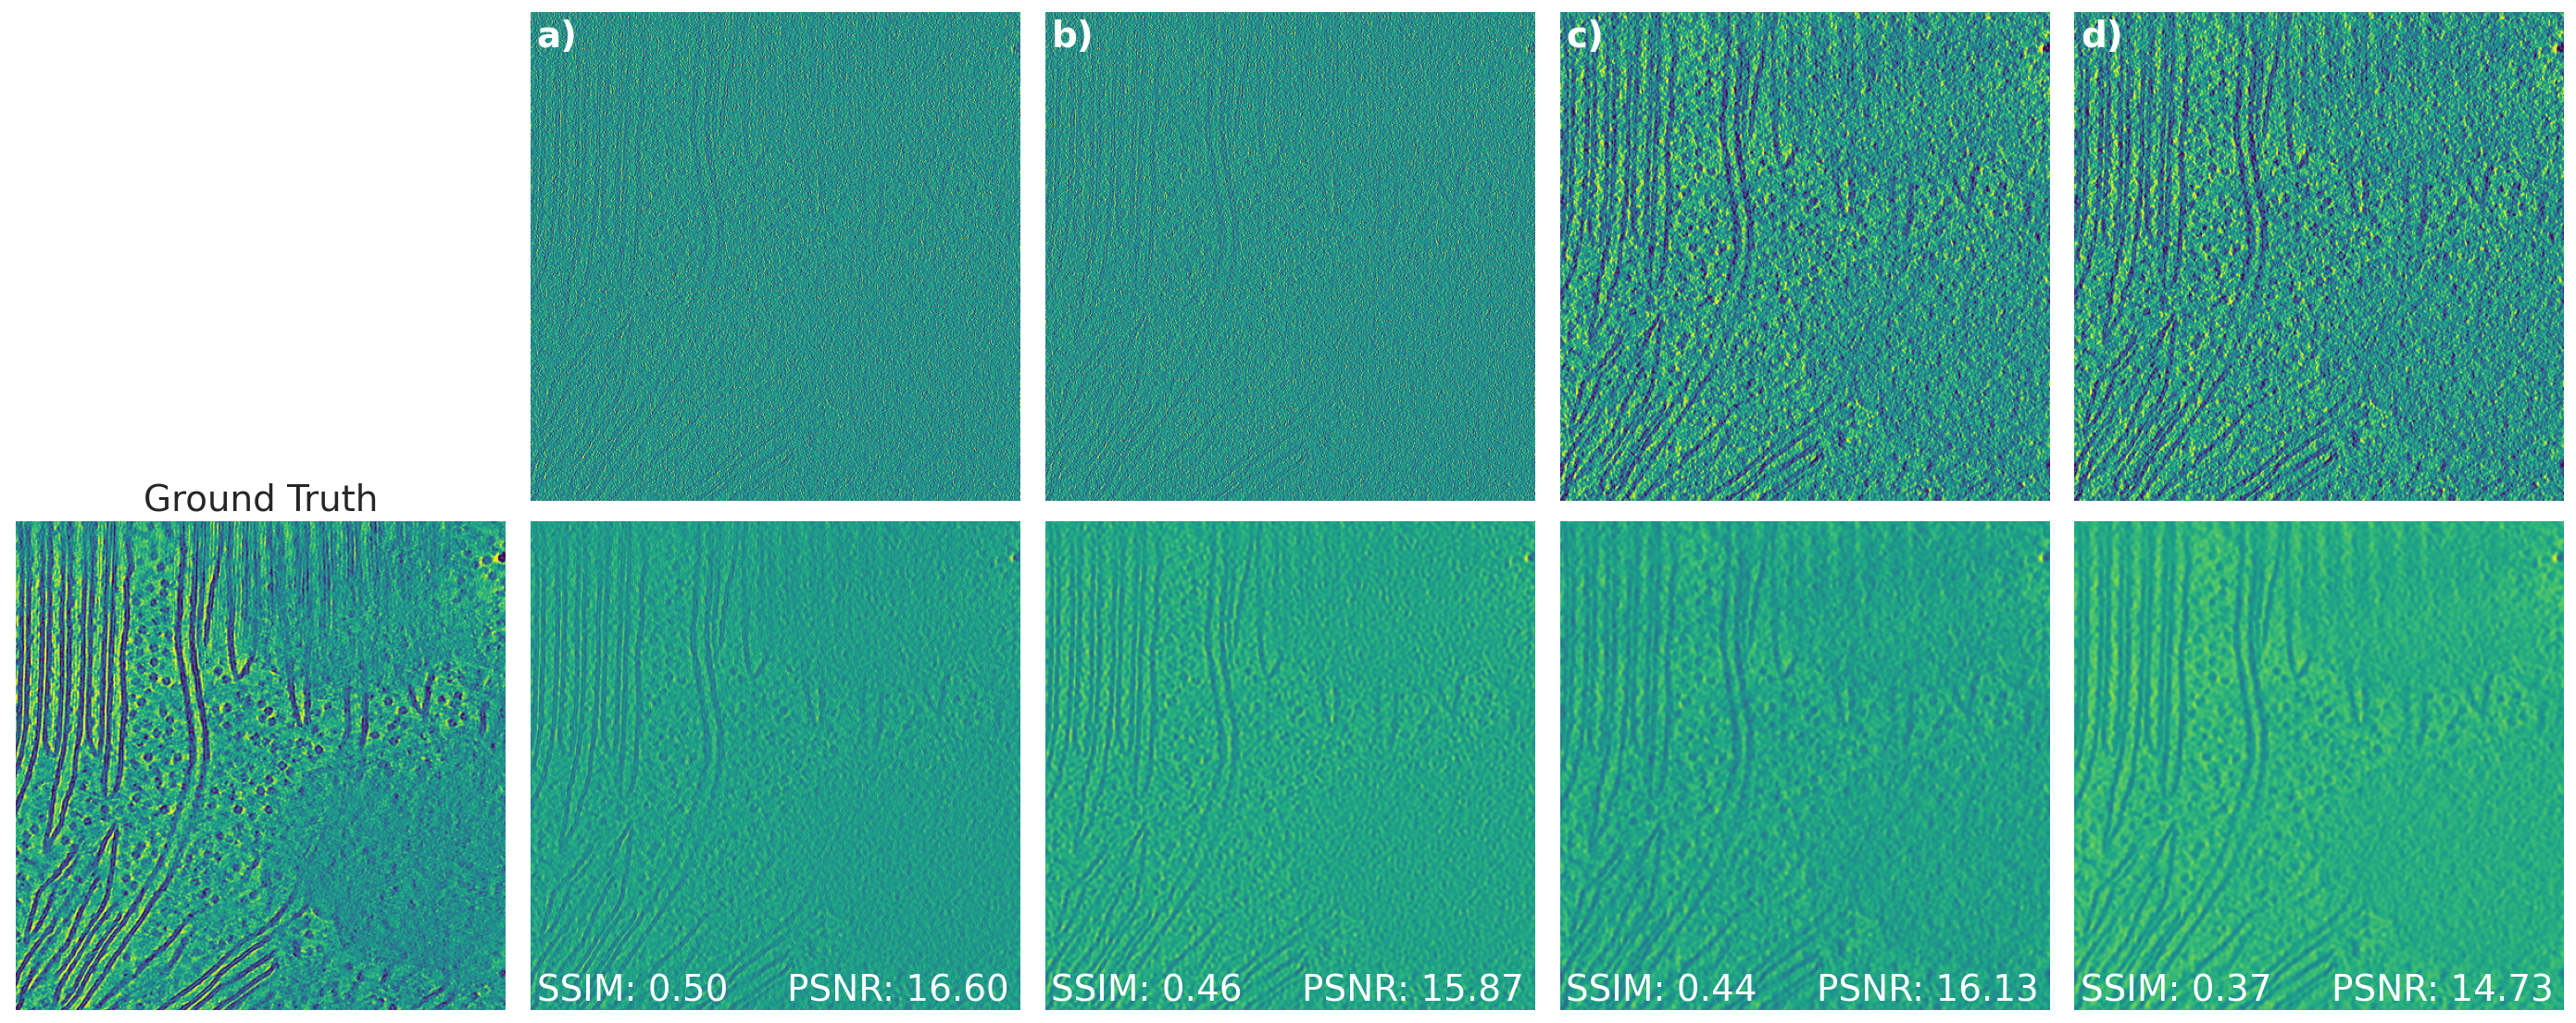

In [3]:
idx = data_log.groupby(['use_deconv_data', 'p'])['full_tomo_ssim'].transform(max) == data_log['full_tomo_ssim']

df = data_log[idx].reset_index()

display(df)

fig, ax = plt.subplots(2, len(df)+1, figsize=(20, 8), dpi=140)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    if row.use_deconv_data=="true":
        noisy = tom_deconv_tomo(**{"vol": noisy, **deconv_kwargs})
    
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[1][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[1][0].set_title('Ground Truth', size=20)
    ax_noisy = ax[0][i+1]
    ax_denoised = ax[1][i+1]
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')

array([['version_0', 'Fourier with mixed Mask, dropout 0.5'],
       ['version_1',
        'HF + VolMask + invMask with bernoulli prob 0.1, dropout 0.5'],
       ['version_2',
        'HF + VolMask + invMask with bernoulli prob 0.1, dropout 0.7'],
       ['version_3', 'Fourier with mixed Mask, dropout 0.5 deconvolved'],
       ['version_4',
        'HF + VolMask + invMask with bernoulli prob 0.1, dropout 0.5 deconvolved'],
       ['version_5',
        'HF + VolMask + invMask with bernoulli prob 0.1, dropout 0.7 deconvolved']],
      dtype=object)

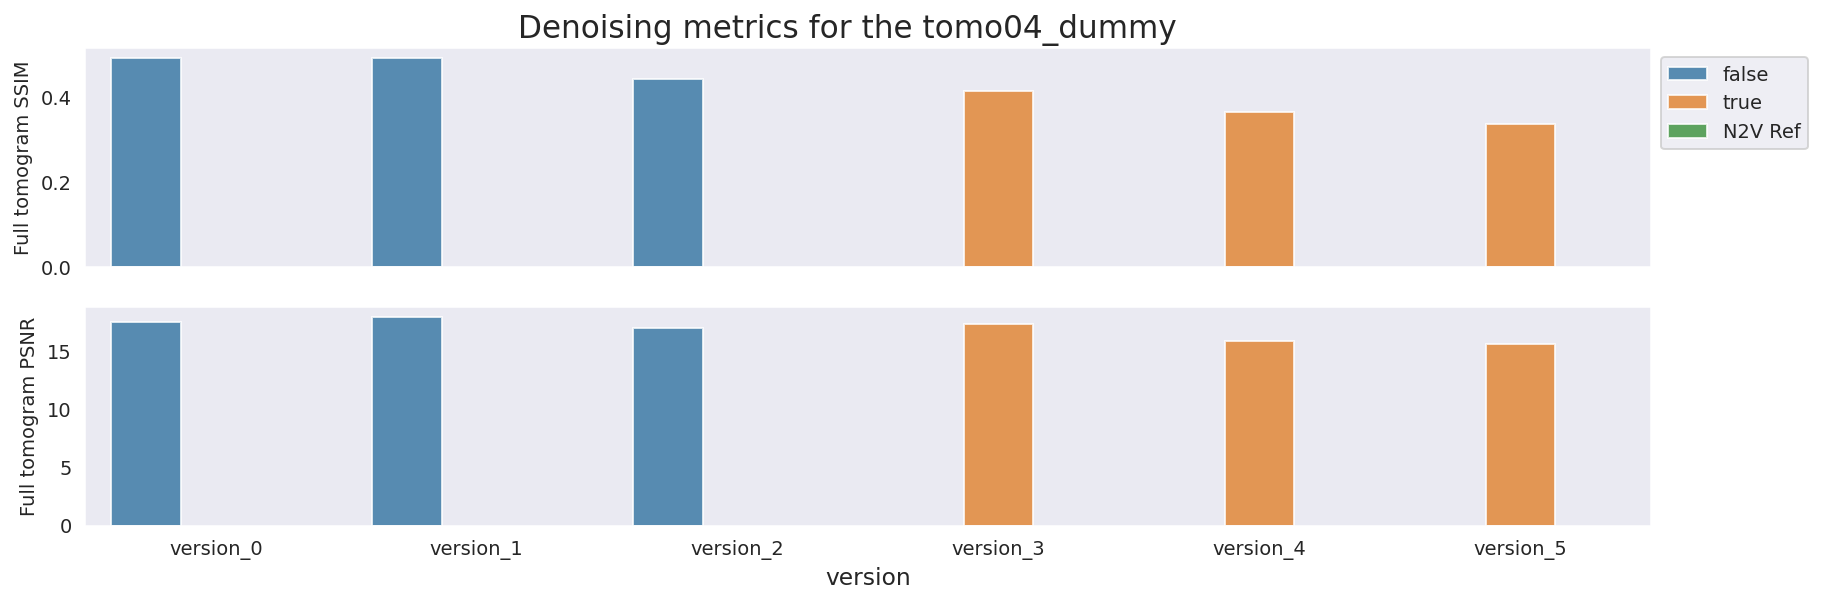

In [18]:
y_cols = ["full_tomo_ssim", "full_tomo_psnr"]
x_col = "version"
hue_col = "use_deconv_data"

df = data_log.groupby([x_col, hue_col])[y_cols].mean().reset_index()

df2 = data_log.groupby([x_col])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2[hue_col] = 'N2V Ref'
df2 = df2[[x_col, hue_col, 'n2v_ssim', 'n2v_psnr']]

df2.columns = [x_col, hue_col] + y_cols

df = pd.concat([df, df2])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, dpi=140)

plt.tight_layout()
name = data_log.tomo_path.unique()[0].split('/')[-1].replace('.mrc', '')
display(data_log[["version", "Version_comment"]].values)

if name == 'tomoPhantom_model14':
    name = '"cell" model'
if name == 'tomoPhantom_model16':
    name = '"spaceship" model'
if name == 'tomoPhantom_model8':
    name = '"blobs" model'
    
plt.suptitle('Denoising metrics for the %s' %name, y=1.01)

sns.barplot(data=df, hue=hue_col, y=y_cols[0], x=x_col, ax=ax0, alpha=0.8)
ax0.set_xlabel('')
sns.barplot(data=df, hue=hue_col, y=y_cols[1], x=x_col, ax=ax1, alpha=0.8)
ax1.set_xlabel(x_col)

ax0.set_ylabel('Full tomogram SSIM', fontsize=10)
ax1.set_ylabel('Full tomogram PSNR', fontsize=10)
ax0.legend(bbox_to_anchor=(1, 1))
ax1.get_legend().remove()

# Tomo02

In [5]:
tomo_list = ['tomo02_dummy']

data_log = []

for tomo in tomo_list:
    logdir = 'data/S2SDenoising/model_logs/%s/fourierHFplusVolMask_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True, ignore_deconv=False)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log

model    version                    dataset  \
0  fourierHFplusVolMask_comparison  version_0  singleCET_FourierDataset    
1  fourierHFplusVolMask_comparison  version_1  singleCET_FourierDataset    
4  fourierHFplusVolMask_comparison  version_2  singleCET_FourierDataset    
3  fourierHFplusVolMask_comparison  version_3  singleCET_FourierDataset    
2  fourierHFplusVolMask_comparison  version_4  singleCET_FourierDataset    

  TV_alpha                                    Version_comment     transform  \
0        0                            Fourier with mixed Mask  {'p': '0.5'}   
1        0                            Fourier with mixed Mask  {'p': '0.5'}   
4        0                      Fourier with mixed Mask p=0.5  {'p': '0.5'}   
3        0                      Fourier with mixed Mask p=0.7  {'p': '0.5'}   
2        0  Fourier with mixed Mask and random phase shift...  {'p': '0.5'}   

   full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0       16.538216        0.404477      13.907833       0.336667   
1       15.668243        0.385675      13.907833       0.336667   
4       16.598225        0.417785      13.907833       0.336667   
3       15.653807        0.321247      13.907833       0.336667   
2       15.175074        0.262588      13.907833       0.336667   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p n2v_psnr n2v_ssim  baseline_psnr_best  \
0             null           false  0.3     None     None           13.907833   
1             null           false  0.5     None     None           13.907833   
4             null           false  0.5     None     None           13.907833   
3             null           false  0.7     None     None           13.907833   
2             null           false  0.7     None     None           13.907833   

   baseline_ssim_best  ssim_vs_baseline  n2v_ssim_vs_baseline  \
0            0.336667         20.141615                   NaN   
1            0.336667         14.556881                   NaN   
4            0.336667         24.094293                   NaN   
3            0.336667         -4.580199                   NaN   
2            0.336667        -22.003721                   NaN   

   psnr_vs_baseline  n2v_psnr_vs_baseline noise_level     tomo_name  \
0         18.912957                   NaN        None  tomo02_dummy   
1         12.657689                   NaN        None  tomo02_dummy   
4         19.344434                   NaN        None  tomo02_dummy   
3         12.553887                   NaN        None  tomo02_dummy   
2          9.111704                   NaN        None  tomo02_dummy   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
4  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

index                            model    version  \
0      0  fourierHFplusVolMask_comparison  version_0   
1      4  fourierHFplusVolMask_comparison  version_2   
2      3  fourierHFplusVolMask_comparison  version_3   

                     dataset TV_alpha                Version_comment  \
0  singleCET_FourierDataset         0        Fourier with mixed Mask   
1  singleCET_FourierDataset         0  Fourier with mixed Mask p=0.5   
2  singleCET_FourierDataset         0  Fourier with mixed Mask p=0.7   

      transform  full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0  {'p': '0.5'}       16.538216        0.404477      13.907833       0.336667   
1  {'p': '0.5'}       16.598225        0.417785      13.907833       0.336667   
2  {'p': '0.5'}       15.653807        0.321247      13.907833       0.336667   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p n2v_psnr n2v_ssim  baseline_psnr_best  \
0             null           false  0.3     None     None           13.907833   
1             null           false  0.5     None     None           13.907833   
2             null           false  0.7     None     None           13.907833   

   baseline_ssim_best  ssim_vs_baseline  n2v_ssim_vs_baseline  \
0            0.336667         20.141615                   NaN   
1            0.336667         24.094293                   NaN   
2            0.336667         -4.580199                   NaN   

   psnr_vs_baseline  n2v_psnr_vs_baseline noise_level     tomo_name  \
0         18.912957                   NaN        None  tomo02_dummy   
1         19.344434                   NaN        None  tomo02_dummy   
2         12.553887                   NaN        None  tomo02_dummy   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

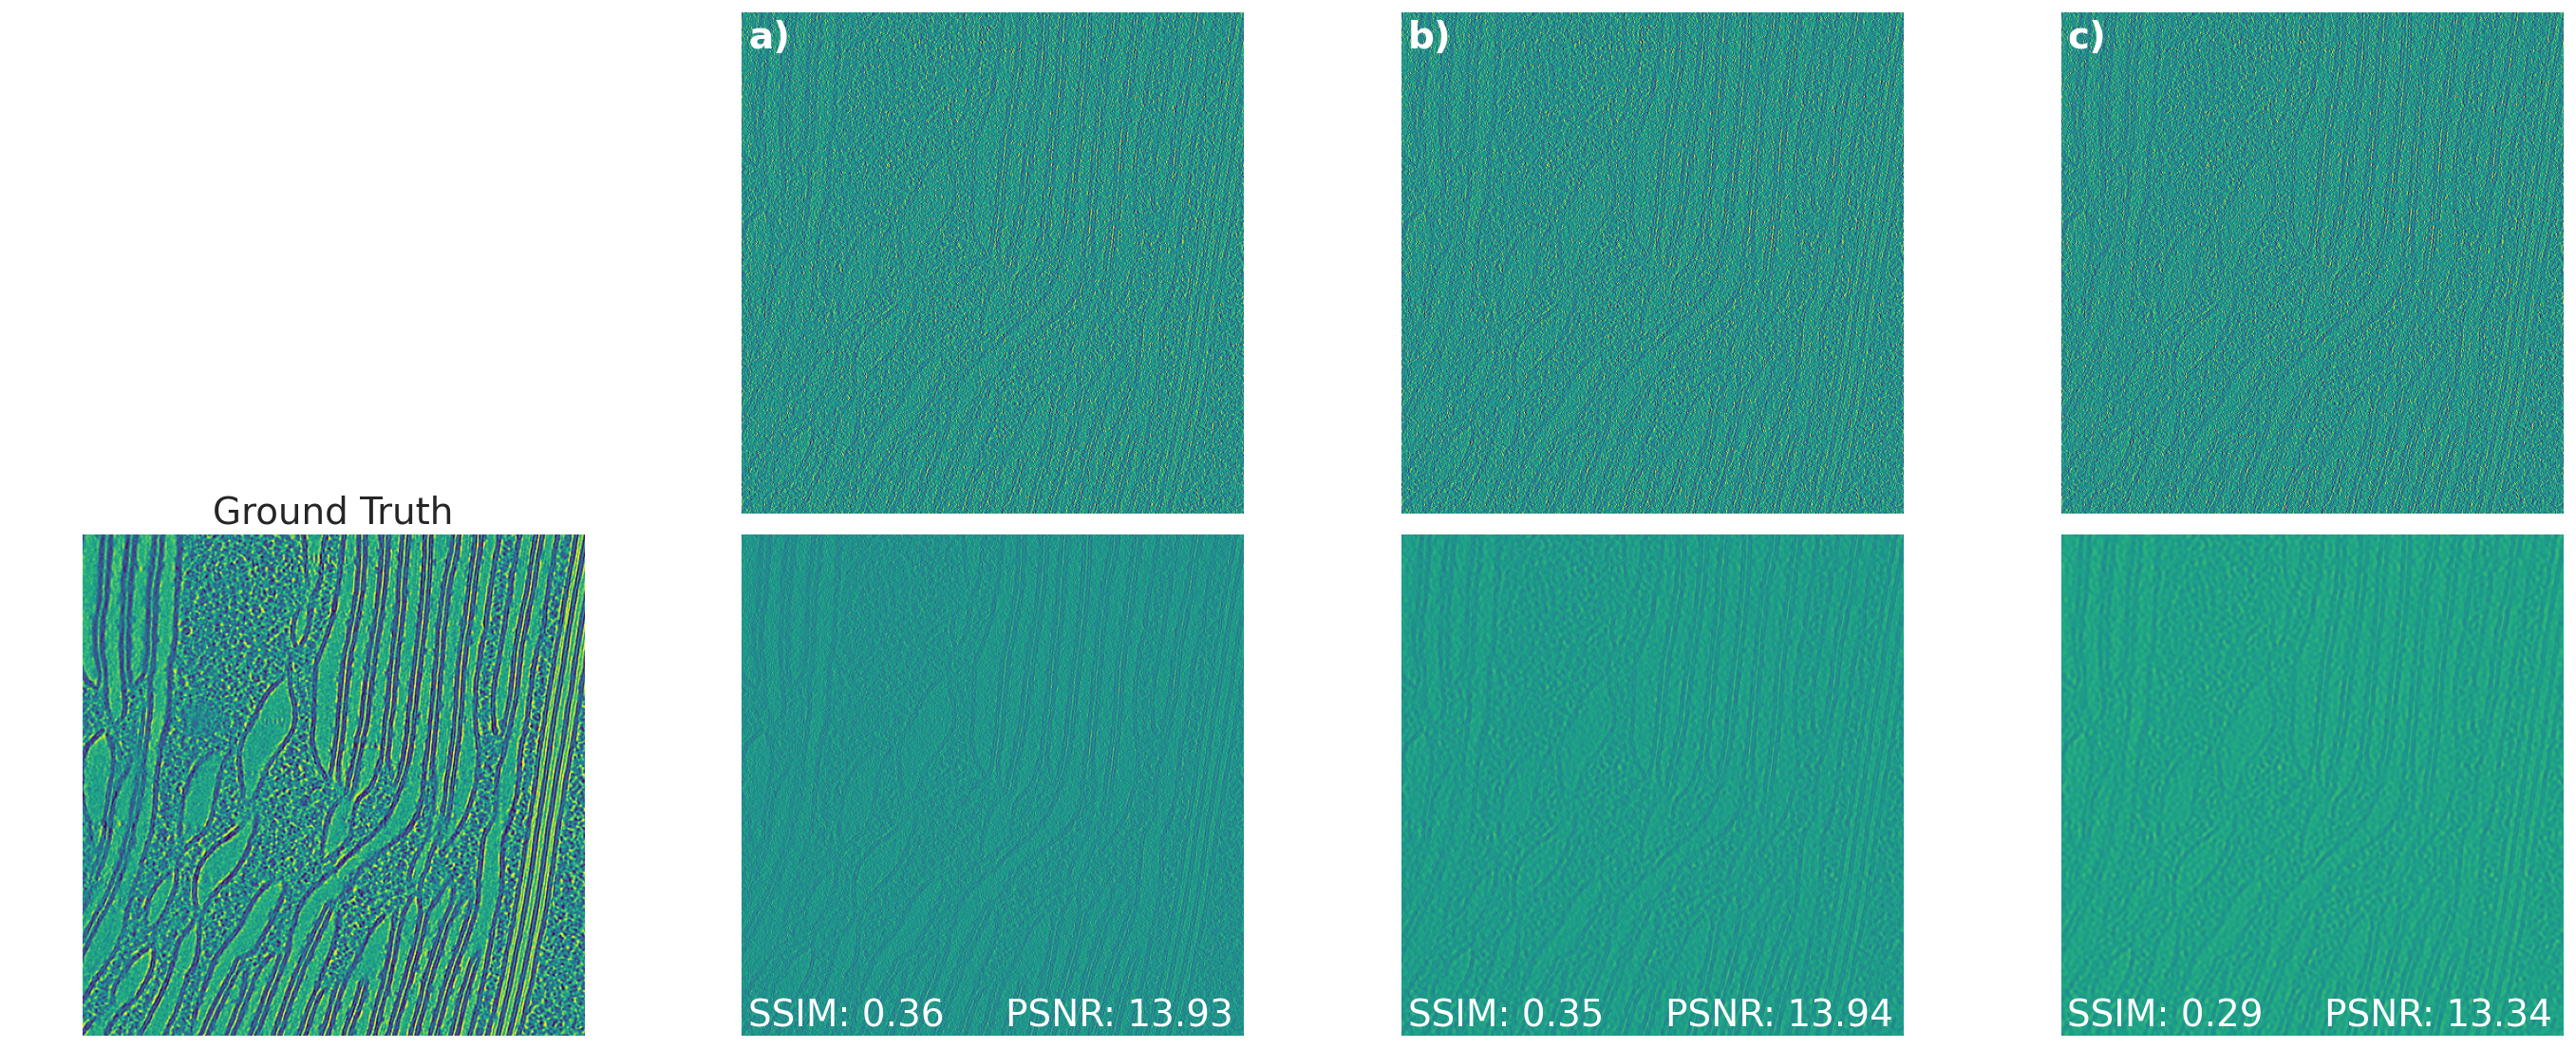

In [6]:
idx = data_log.groupby(['p'])['full_tomo_ssim'].transform(max) == data_log['full_tomo_ssim']

df = data_log[idx].reset_index()

display(df)

fig, ax = plt.subplots(2, len(df)+1, figsize=(20, 8), dpi=140)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    if row.use_deconv_data=="true":
        noisy = tom_deconv_tomo(**{"vol": noisy, **deconv_kwargs})
    
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[1][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[1][0].set_title('Ground Truth', size=20)
    ax_noisy = ax[0][i+1]
    ax_denoised = ax[1][i+1]
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')

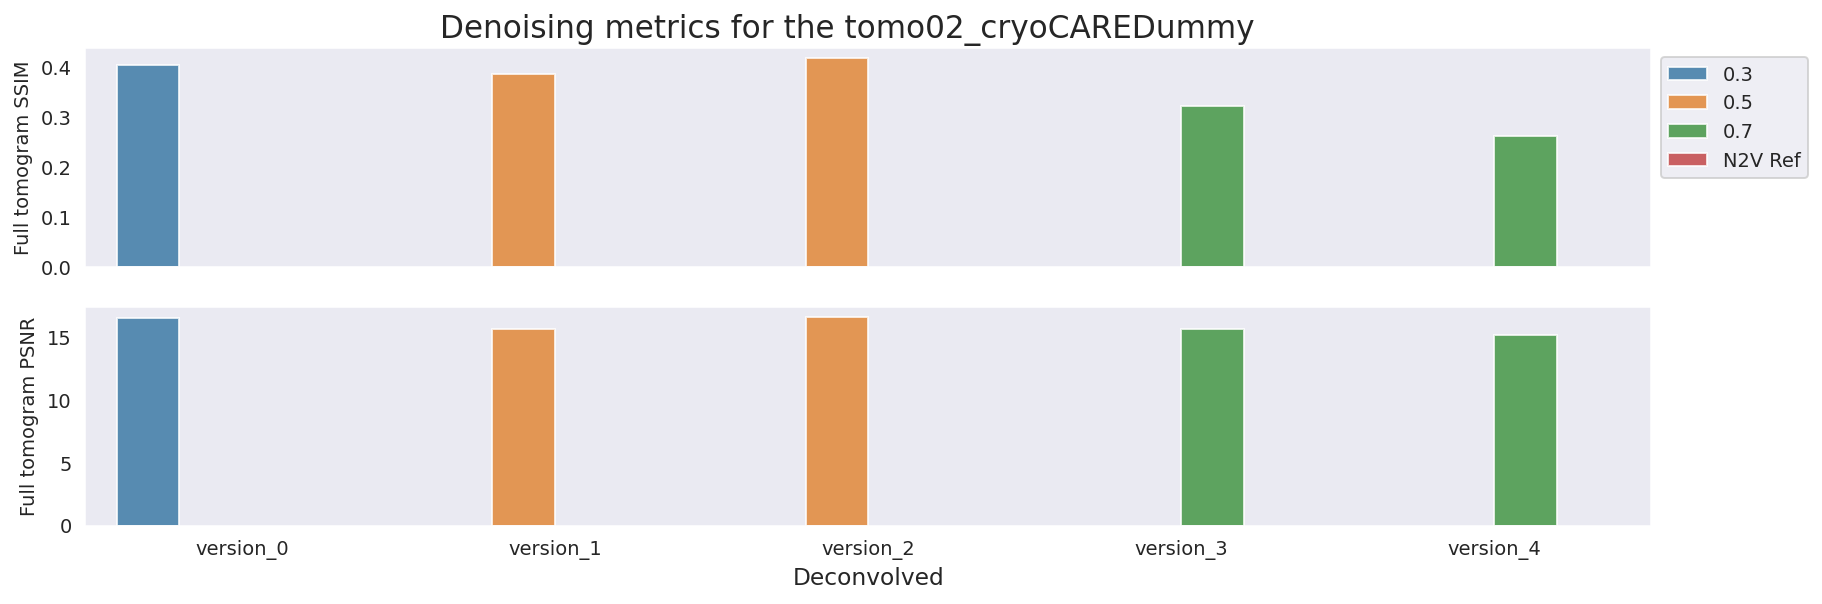

In [9]:
df = data_log.groupby(['version', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['version'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['version', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['version', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, dpi=140)

plt.tight_layout()
name = data_log.gt_tomo_path.unique()[0].split('/')[-1].replace('.mrc', '')

if name == 'tomoPhantom_model14':
    name = '"cell" model'
if name == 'tomoPhantom_model16':
    name = '"spaceship" model'
if name == 'tomoPhantom_model8':
    name = '"blobs" model'
    
plt.suptitle('Denoising metrics for the %s' %name, y=1.01)

sns.barplot(data=df, hue='p', y='full_tomo_ssim', x='version', ax=ax0, alpha=0.8)
ax0.set_xlabel('')
sns.barplot(data=df, hue='p', y='full_tomo_psnr', x='version', ax=ax1, alpha=0.8)
ax1.set_xlabel('Deconvolved')

ax0.set_ylabel('Full tomogram SSIM', fontsize=10)
ax1.set_ylabel('Full tomogram PSNR', fontsize=10)
ax0.legend(bbox_to_anchor=(1, 1))
ax1.get_legend().remove()